## Setup

In [2]:
install.packages('devtools')
install.packages("zoo")
install.packages("proj4")
install.packages("ggalt")

devtools::install_github('bbc/bbplot')

#This line of code installs the pacman page if you do not have it installed - if you do, it simply loads the package
if(!require(pacman))install.packages("pacman")

pacman::p_load('dplyr', 'tidyr', 'gapminder',
               'ggplot2',
               'forcats', 'R.utils', 'png', 
               'grid', 'ggpubr', 'scales',
               'bbplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Using github PAT from envvar GITHUB_TOKEN. Use `gitcreds::gitcreds_set()` and unset GITHUB_TOKEN in .Renviron (or elsewhere) if you want to use the more secure git credential store instead.

Skipping install of 'bbplot' from a github remote, the SHA1 (82af5952) has not changed since last install.
  Use `force = TRUE` to force installation

Loading required package: pacman



In [3]:
# Update model names
model_names_map <- c(
  "command-r-plus" = "Command R+",
  "llama-3-70b-instruct" = "LLaMA 3 70B",
  "llama-3-8b-instruct" = "LLaMA 3 8B",
  "mixtral-8x7b-instruct-v0.1" = "Mixtral 8x7B"
)

Saving 6.67 x 6.67 in image


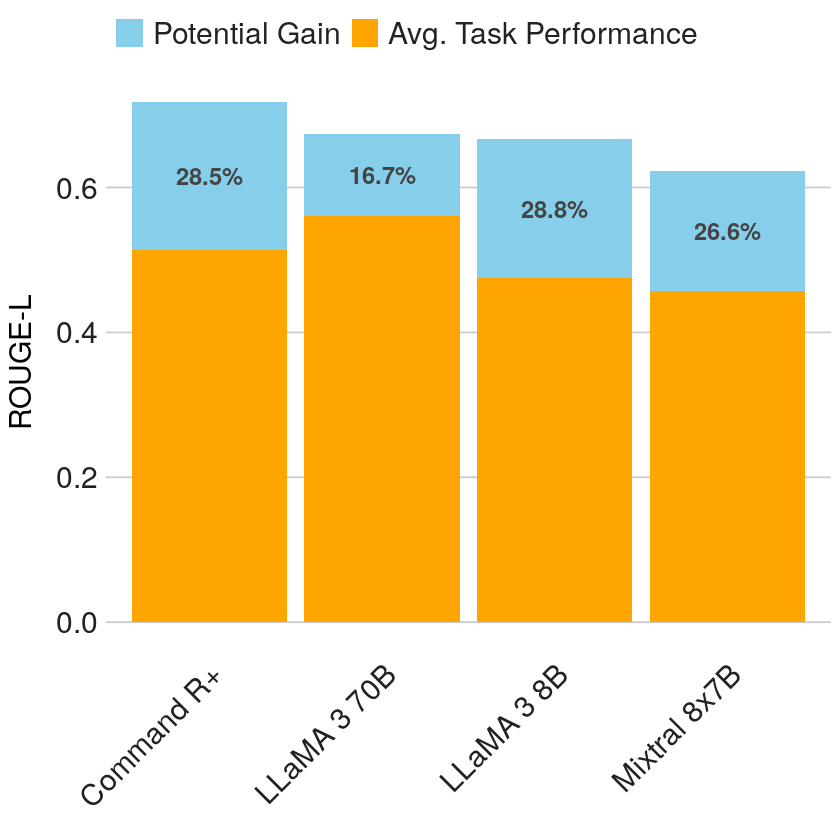

In [12]:
# Load necessary libraries
library(ggplot2)
library(tidyr)
library(dplyr)

# Read data from CSV
data <- read.csv("outputs/results/average_potential_performance_gains_by_models.csv")

# Update model names
data$model <- factor(data$model, levels = names(model_names_map), labels = model_names_map)

# Calculate percentage gains
data <- data %>%
  mutate(percent_gain = (potential_rouge_l_gain / (potential_rouge_l_gain + average_base_performance)) * 100)

# Reshape data to a long format suitable for a stacked bar chart
data_long <- data %>%
  tidyr::pivot_longer(cols = c("average_base_performance", "potential_rouge_l_gain"), 
                      names_to = "performance_type", values_to = "value")

# Reorder levels to ensure base performance appears below gain
data_long$performance_type <- factor(data_long$performance_type, 
                                     levels = c("potential_rouge_l_gain", "average_base_performance"))

# Rename the factor levels
levels(data_long$performance_type) <- c("Potential Gain", "Avg. Task Performance")

# Adjust labels to include performance_type and be centered within the 'Potential Gain' bars
gain_labels <- data %>%
  mutate(y_position = average_base_performance + (potential_rouge_l_gain / 2),
         label = sprintf("%.1f%%", percent_gain),
         performance_type = "Potential Gain")

# Create the bar chart
ggplot(data_long, aes(fill = performance_type, y = value, x = model)) +
  geom_bar(position = "stack", stat = "identity") +
  geom_text(data = gain_labels, aes(x = model, y = y_position, label = label),
            color = "#444444", size = 5, fontface = "bold") +
  labs(x = "Model",
       y = "ROUGE-L",  # Make sure to set this label here
       fill = "Performance Type") +
  scale_fill_manual(values = c("Avg. Task Performance" = "orange", "Potential Gain" = "skyblue")) +
  bbc_style() +  # Replace the theme here for visibility
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.justification = "left",
        axis.title.y = element_text(size = 18, margin = margin(t = 0, r = 10, b = 0, l = 0)))  # Add space with 'r' parameter

ggsave("outputs/figures/teaser_potential_gain_across_models.pdf")